In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Webscrapping Data

In [108]:
import re
from bs4 import BeautifulSoup
import requests
import time

In [417]:
Price = []
Tenants_Preffered = []
Bathroom = []
Owner = []
Address =[]
Info = []
PropertyName = []
Deposit = []
AreaSqMetre = []
DealerType = []


In [418]:
PageNo = []
for r in range(1,25):
    url = 'https://www.99acres.com/property-for-rent-in-hyderabad-ffid'
    soup = requests.get(url)
    soup.status_code
    soup = BeautifulSoup(soup.content)
    start_time = time.time()
    
    Property = soup.findAll('table',{'class':"srpTuple__tupleTable"})
    DealerInfo = soup.findAll('div',{'class':'srpTuple__srpDealerInfo'})
    
    for x in DealerInfo:
        owner = x.find_all('div',{'class':'list_header_semiBold'})
        for o in owner:
            if o.text is None:
                Owner.append(np.nan)
            else:
                Owner.append(o.text)
    
        dealer_type =  x.findAll('div',{'class':'caption_strong_small'})
        for x in dealer_type:
            if x.text is None:
                DealerType.append(np.nan)
            else:
                DealerType.append(x.text)    
    
    
    for x in Property:
        info = x.find_all('h2')
        propname = x.findAll('td',{'class':'list_header_bold srpTuple__spacer10'})
        price = x.findAll('td',{'class':'srpTuple__midGrid title_semiBold srpTuple__spacer16'})
        area = re.findall('\d+ sq\.m\.',x.text)
        regex = re.findall('FOR SINGLE WOMEN|FOR SINGLE MEN',x.text)
    
        for i in info:
            if i.text is None:
                Info.append(np.nan)
            else:
                Info.append(i.text)
            
        for p in price:
            if p.text is None:
                Price.append(np.nan)
            else:
                Price.append(p.text)        
    
        for prop in propname:
            if prop.text is None:
                PropertyName.append(np.nan)
            else:
                PropertyName.append(prop.text)
        
        AreaSqMetre.append(area)
            
        Tenants_Preffered.append(regex)
    
    
        PageNo.append(r)
    print('Page {0} loads in {1} seconds'.format(r,time.time()-start_time))

Page 1 loads in 0.04686379432678223 seconds
Page 2 loads in 0.046863555908203125 seconds
Page 3 loads in 0.046896934509277344 seconds
Page 4 loads in 0.0624847412109375 seconds
Page 5 loads in 0.04686379432678223 seconds
Page 6 loads in 0.04686403274536133 seconds
Page 7 loads in 0.04686403274536133 seconds
Page 8 loads in 0.046863555908203125 seconds
Page 9 loads in 0.04686760902404785 seconds
Page 10 loads in 0.062483787536621094 seconds
Page 11 loads in 0.0624849796295166 seconds
Page 12 loads in 0.0624852180480957 seconds
Page 13 loads in 0.04686331748962402 seconds
Page 14 loads in 0.0468602180480957 seconds
Page 15 loads in 0.06248593330383301 seconds
Page 16 loads in 0.0624849796295166 seconds
Page 17 loads in 0.0624849796295166 seconds
Page 18 loads in 0.04686307907104492 seconds
Page 19 loads in 0.04686403274536133 seconds
Page 20 loads in 0.06286406517028809 seconds
Page 21 loads in 0.06248617172241211 seconds
Page 22 loads in 0.0624852180480957 seconds
Page 23 loads in 0.046

In [420]:
Price = Price[::3]            

In [422]:
len(Price)

624

In [423]:
len(Info)

624

In [424]:
len(AreaSqMetre)

624

In [425]:
len(PropertyName)

624

In [426]:
len(Owner)

624

In [427]:
len(DealerType)

624

In [493]:
Property_df = pd.DataFrame({'Info':Info, 'PropertyName':PropertyName, 'AreaSqMetre':AreaSqMetre, 'Price':Price ,'Tenants_Preffered':Tenants_Preffered, 'Owner':Owner,'DealerType':DealerType})

In [494]:
#BHK
Property_df['BHK'] = Property_df['Info'].apply(lambda x : re.findall('[0-9]',x))

In [495]:
#Type
Property_df['Type'] = Property_df['Info'].apply(lambda x : re.findall('Independent [A-z]+|Residential [A-z]+',x))

In [496]:
Property_df.head()

,Info,PropertyName,AreaSqMetre,Price,Tenants_Preffered,Owner,DealerType,BHK,Type
0,2 Bedroom Independent House for rent in Gowlid...,Nestaway-156240,[74 sq.m.],"₹ 20,000 /monthDeposit ₹ 20000","[FOR SINGLE MEN, FOR SINGLE WOMEN]",Nestaway Technologies Pvt Ltd,"Posted on 11th Mar, 2021 by Dealer",[2],[Independent House]
1,3 BHK Residential Apartment for rent in Gachib...,Gayathri Nest,[204 sq.m.],"₹ 28,000 /monthDeposit ₹ 28000",[FOR SINGLE WOMEN],subhash reddy,Posted on Yesterday by Owner,[3],[Residential Apartment]
2,3 BHK Residential Apartment for rent in Gachib...,My Home Vihanga,[170 sq.m.],"₹ 38,000 /monthDeposit ₹ 80000",[],KMGandhi,Posted on Yesterday by Owner,[3],[Residential Apartment]
3,3 BHK Residential Apartment for rent in Kondapur,Sri Venkateswara Chaturbhuja Homes,[169 sq.m.],"₹ 32,000 /month",[],praveen,Posted on Yesterday by Owner,[3],[Residential Apartment]
4,3 BHK Residential Apartment for rent in Madhapur,Sahiti Sri Vidhya Ambrosia,[169 sq.m.],"₹ 50,000 /month",[],Mahesh,"Posted on 16th Apr, 2021 by Owner",[3],[Residential Apartment]


In [2]:
Property_df['Area'] = Property_df['Info'].apply(lambda x : re.findall('[A-z][a-z]+$',x))

Property_df['Area'] = Property_df['Area'].apply(lambda x : ''.join(x))

Property_df['Area'] = Property_df['Area'].replace('Hills','Lanco Hills')

Property_df['Area'] = Property_df['Area'].replace('Nagar','Pragathi Nagar')

Property_df['Area'] = Property_df['Area'].replace('nagar','Sai Nagar')

Property_df['Area'] = Property_df['Area'].replace('office','RTO Office')

Property_df['Area'] = Property_df['Area'].replace('City','Hitech City')

Property_df['Area'] = Property_df['Area'].replace('Junction','Appa Junction')

Property_df['Area'] = Property_df['Area'].replace('hitechcity','Hitech City')

Property_df['Area'] = Property_df['Area'].replace('kokapet','Kokapet')

Property_df['Area'] = Property_df['Area'].replace('','BHEL')

NameError: name 'Property_df' is not defined

In [26]:
Property_df['Area'].value_counts()

Kokapet           96
Kondapur          72
Pragathi Nagar    72
Gachibowli        48
Madhapur          48
Hitech City       48
Puppalaguda       24
Lanco Hills       24
Sai Nagar         24
Gandipet          24
Ameerpet          24
BHEL              24
Gowlidoddy        24
Appa Junction     24
RTO Office        24
Name: Area, dtype: int64

In [509]:
Property_df.head()

,Info,PropertyName,AreaSqMetre,Price,Tenants_Preffered,Owner,DealerType,BHK,Type,Area
0,2 Bedroom Independent House for rent in Gowlid...,Nestaway-156240,[74 sq.m.],"₹ 20,000 /monthDeposit ₹ 20000","[FOR SINGLE MEN, FOR SINGLE WOMEN]",Nestaway Technologies Pvt Ltd,"Posted on 11th Mar, 2021 by Dealer",[2],[Independent House],Gowlidoddy
1,3 BHK Residential Apartment for rent in Gachib...,Gayathri Nest,[204 sq.m.],"₹ 28,000 /monthDeposit ₹ 28000",[FOR SINGLE WOMEN],subhash reddy,Posted on Yesterday by Owner,[3],[Residential Apartment],Gachibowli
2,3 BHK Residential Apartment for rent in Gachib...,My Home Vihanga,[170 sq.m.],"₹ 38,000 /monthDeposit ₹ 80000",[],KMGandhi,Posted on Yesterday by Owner,[3],[Residential Apartment],Gachibowli
3,3 BHK Residential Apartment for rent in Kondapur,Sri Venkateswara Chaturbhuja Homes,[169 sq.m.],"₹ 32,000 /month",[],praveen,Posted on Yesterday by Owner,[3],[Residential Apartment],Kondapur
4,3 BHK Residential Apartment for rent in Madhapur,Sahiti Sri Vidhya Ambrosia,[169 sq.m.],"₹ 50,000 /month",[],Mahesh,"Posted on 16th Apr, 2021 by Owner",[3],[Residential Apartment],Madhapur


In [510]:
Property_df['Price'] = Property_df['Price'].apply(lambda x : re.findall('[0-9]+,[0-9]+',x))

Property_df['Price'] = Property_df['Price'].apply(lambda x : ''.join(x))

Property_df['Price'] = Property_df['Price'].str.replace(',','')

In [ ]:
Property_df['Deposit'] = [re.findall('[0-9]{5,}|[0-9] month',x) for x in Price]

In [528]:
Property_df['Deposit'] = Property_df['Deposit'].apply(lambda x : ''.join(x))
Property_df['AreaSqMetre'] = Property_df['AreaSqMetre'].apply(lambda x : ''.join(x))
Property_df['Tenants_Preffered'] = Property_df['Tenants_Preffered'].apply(lambda x : ''.join(x))
Property_df['BHK'] = Property_df['BHK'].apply(lambda x : ''.join(x))
Property_df['Type'] = Property_df['Type'].apply(lambda x : ''.join(x))
Property_df['DealerType'] = Property_df['DealerType'].apply(lambda x : ''.join(x))

In [536]:
Property_df.head()

,Info,PropertyName,AreaSqMetre,Price,Tenants_Preffered,Owner,DealerType,BHK,Type,Area,Deposit
0,2 Bedroom Independent House for rent in Gowlid...,Nestaway-156240,74,20000,"FOR SINGLE MEN,WOMEN",Nestaway Technologies Pvt Ltd,Dealer,2,Independent House,Gowlidoddy,20000
1,3 BHK Residential Apartment for rent in Gachib...,Gayathri Nest,204,28000,FOR SINGLE WOMEN,subhash reddy,Owner,3,Residential Apartment,Gachibowli,28000
2,3 BHK Residential Apartment for rent in Gachib...,My Home Vihanga,170,38000,ANYONE,KMGandhi,Owner,3,Residential Apartment,Gachibowli,80000
3,3 BHK Residential Apartment for rent in Kondapur,Sri Venkateswara Chaturbhuja Homes,169,32000,ANYONE,praveen,Owner,3,Residential Apartment,Kondapur,
4,3 BHK Residential Apartment for rent in Madhapur,Sahiti Sri Vidhya Ambrosia,169,50000,ANYONE,Mahesh,Owner,3,Residential Apartment,Madhapur,


In [114]:
Property_df['Tenants_Preffered'] = Property_df['Tenants_Preffered'].replace('FOR SINGLE MEN,WOMEN','ANYONE')
Property_df['Tenants_Preffered'] = Property_df['Tenants_Preffered'].replace('','ANYONE')
Property_df['Tenants_Preffered'] = Property_df['Tenants_Preffered'].replace('FOR SINGLE WOMEN','WOMEN')

In [532]:
Property_df['DealerType'] = Property_df['DealerType'].apply(lambda x : re.findall('Dealer|Owner',x))

In [ ]:
Property_df['AreaSqMetre'] = Property_df['AreaSqMetre'].apply(lambda x : re.findall('[0-9]+',x))

In [25]:
Property_df.to_csv('C:\\Users\welcome\Data Science\Python\Data\Property_df.csv')

In [21]:
Property_df['Price'] = Property_df['Price'].astype('int64')

In [19]:
Property_df.dropna(subset =['Price'],inplace =True)

In [35]:
Property_df['Deposit'].fillna('none',inplace = True)

In [15]:
for x in range(len(Property_df)):
    if Property_df.loc[x,'Deposit'] == '2 month':
        Property_df.loc[x,'Deposit'] = 2 * Property_df.loc[x,'Price']
    elif Property_df.loc[x,'Deposit'] == '3 month':
        Property_df.loc[x,'Deposit'] = 3 * Property_df.loc[x,'Price']

In [16]:
Property_df['Deposit'].value_counts()

none      120
80000      48
55000      48
80000      48
170000     24
20000      24
45000      24
28000      24
100000     24
30000      24
148000     24
54000      24
60000      24
56000      24
100000     24
70000      24
62000      24
146000     24
Name: Deposit, dtype: int64

In [23]:
Property_df.head()

,Info,PropertyName,AreaSqMetre,Price,Tenants_Preffered,Owner,DealerType,BHK,Type,Area,Deposit
0,2 Bedroom Independent House for rent in Gowlid...,Nestaway-156240,74,20000,ANYONE,Nestaway Technologies Pvt Ltd,Dealer,2,Independent House,Gowlidoddy,20000
1,3 BHK Residential Apartment for rent in Gachib...,Gayathri Nest,204,28000,WOMEN,subhash reddy,Owner,3,Residential Apartment,Gachibowli,28000
2,3 BHK Residential Apartment for rent in Gachib...,My Home Vihanga,170,38000,ANYONE,KMGandhi,Owner,3,Residential Apartment,Gachibowli,80000
3,3 BHK Residential Apartment for rent in Kondapur,Sri Venkateswara Chaturbhuja Homes,169,32000,ANYONE,praveen,Owner,3,Residential Apartment,Kondapur,none
4,3 BHK Residential Apartment for rent in Madhapur,Sahiti Sri Vidhya Ambrosia,169,50000,ANYONE,Mahesh,Owner,3,Residential Apartment,Madhapur,none


In [4]:
Property_df = pd.read_csv('C:\\Users\welcome\Data Science\Python\Data\Property_df.csv')

# Data Analysis

In [14]:
#Null values

Property_df.isnull().sum()

Info                  0
PropertyName         48
AreaSqMetre           0
Price                 0
Tenants_Preffered     0
Owner                 0
DealerType            0
BHK                   0
Type                  0
Area                  0
Deposit               0
dtype: int64

## Univariate Analysis

Text(0.5, 1.0, 'Price Distribution')

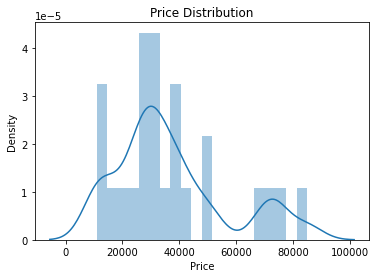

In [27]:
sns.distplot(Property_df['Price']).set_title('Price Distribution')

As you can see Prices of Homes is maximum in between 10,000 and 50,000

(0.0, 6.0)

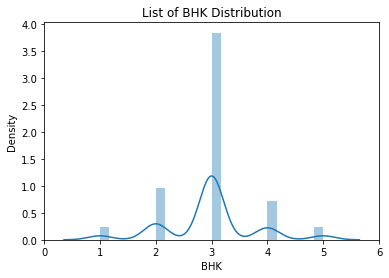

In [28]:
sns.distplot(Property_df['BHK']).set_title('List of BHK Distribution')
plt.xlim(0,6)

As you can see, we have more data  2,3 and 4 BHK Homes 

Text(0.5, 1.0, 'Percentage of Owners and Dealers')

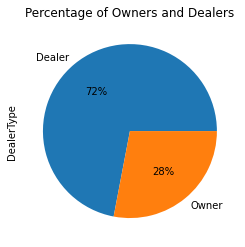

In [26]:
Property_df['DealerType'].value_counts().plot.pie(autopct ='%0.0f%%').set_title('Percentage of Owners and Dealers')

There are only 28% of homes available as owner registered on website.

## Bivariate Analysis

In [39]:
### Price Vs Area correlation

Property_df['Price'].corr(Property_df['AreaSqMetre'])

0.8573097212967771

Text(0.5, 1.0, 'Price Vs Area')

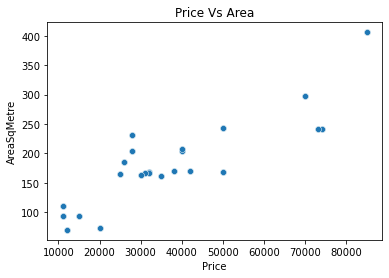

In [42]:
sns.scatterplot(Property_df['Price'],Property_df['AreaSqMetre']).set_title('Price Vs Area')

From the above graph, as you can see Price of homes and Area per sq metre are strongly correlated

### Price Vs BHK correlation

In [71]:
Property_df['Price'].corr(Property_df['BHK'])

0.7127048485054979

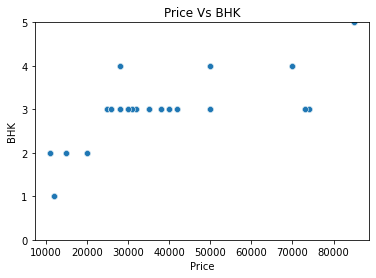

In [80]:
sns.scatterplot(Property_df['Price'],Property_df['BHK']).set_title('Price Vs BHK')
plt.ylim(0,5)
plt.show()

As you see Prices of homes and Rooms of homes are also strongly correlated

## 2 BHK Homes 

In [6]:
Property_df1 = Property_df.loc[Property_df['BHK'] == 2]

### Prices of 2 BHK Homes

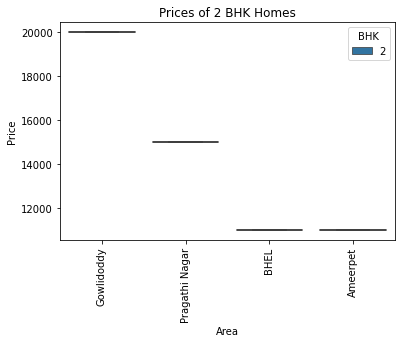

In [46]:
sns.boxplot(x = Property_df1['Area'], y = Property_df1['Price'], hue = Property_df1['BHK']).set_title('Prices of 2 BHK Homes')
plt.xticks(rotation = 90)
plt.show()

2BHK Homes are available only in Gowlidoddy, Pragathi Nagar, BHEL, Ameerpet,
in which Gowlidoddy prices are very high while Ameerpet and BHEL have less prices

### Available Types of Homes

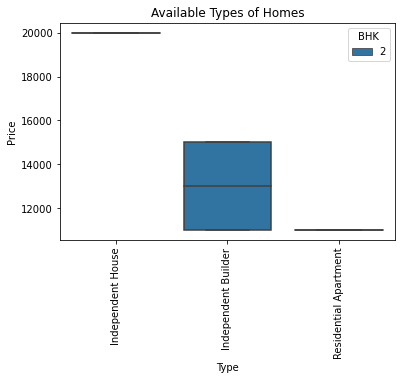

In [48]:
sns.boxplot(x = Property_df1['Type'], y = Property_df1['Price'], hue = Property_df1['BHK']).set_title('Available Types of Homes')
plt.xticks(rotation = 90)
plt.show()

In this data, we have three home types : Independent House, Independent Builder, Residential Apartment. Independent House have higher prices while Independent Builder have  less and then Residential Apartment have lowest

### Price of Area in Average Sq. metres

In [7]:
Property_df1.groupby(by ='Area')['Price','AreaSqMetre'].mean()

,Price,AreaSqMetre
Area,,
Ameerpet,11000,93
BHEL,11000,111
Gowlidoddy,20000,74
Pragathi Nagar,15000,93


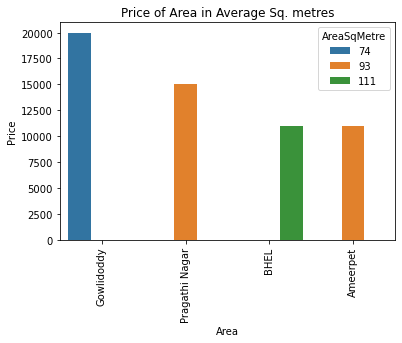

In [49]:
sns.barplot(x = Property_df1['Area'], y = Property_df1['Price'], hue = Property_df1['AreaSqMetre']).set_title('Price of Area in Average Sq. metres')
plt.xticks(rotation = 90)
plt.show()

As you see, despite Gowlidoddy having highest Price for 2BHK homes, their Area per sq. metre is very low as compared to others. While BHEL have low prices and high Area per sq.m  and Pragathi Nagar have same Area as Ameerpet but Prices of Pragathi Nagar are high

### Availability of Homes for Women Only

In [11]:
Property_df2 = Property_df.loc[Property_df['Tenants_Preffered'] =='WOMEN']

In [121]:
pd.crosstab(index = Property_df2['Tenants_Preffered'], columns = Property_df2['Area'])

Area,Gachibowli,Puppalaguda
Tenants_Preffered,,
WOMEN,24,24


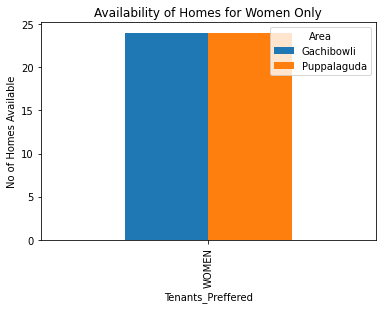

In [13]:
pd.crosstab(index = Property_df2['Tenants_Preffered'] , columns = Property_df2['Area']).plot.bar().set_title('Availability of Homes for Women Only')
plt.xticks(rotation = 90)
plt.ylabel('No of Homes Available')
plt.show()

There are only two areas where Owners of home preferred Womens only rent policy : Gachibowli and Puppalaguda and same no of homes available in both areas 

### Range of Price

In [15]:
#For Middle Class Customer(1,2 BHK)

Property_df3 = Property_df.loc[(Property_df['Price'] <= 15000) & (Property_df['Price'] >= 10000)]

In [16]:
Property_df3.groupby(by ='Area')['Price','BHK'].mean()

,Price,BHK
Area,,
Ameerpet,11000,2
BHEL,11000,2
Kondapur,12000,1
Pragathi Nagar,15000,2


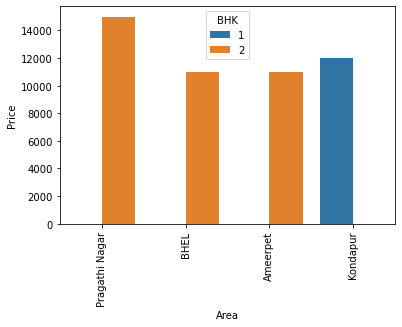

In [50]:
sns.barplot(x = Property_df3['Area'], y = Property_df3['Price'], hue = Property_df3['BHK'])
plt.xticks(rotation = 90)
plt.show()

If any Customer have budget of 10,000 - 15,000, he gets home in only Ameerpet, BHEL, Kondapur & Pragathi Nagar and Only 1 & 2 BHK options are available. Pragathi Nagar has higher price compared to others.

In [51]:
#For Rich Customer(3,4,5 BHK)

Property_df4 = Property_df.loc[(Property_df['Price'] >= 40000) & (Property_df['BHK']>= 3)]

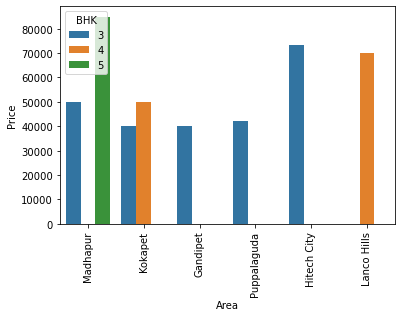

In [56]:
sns.barplot(x = Property_df4['Area'], y = Property_df4['Price'], hue = Property_df4['BHK'],ci = None)
plt.xticks(rotation = 90)
plt.show()

If any customer have healthy budget of 40,000Rs or more, he have get variety of 3,4,5 BHK homes in Madhapur, Kokapet, Gandipet, Puppalaguda, Hitech City and Lanco Hills.Price of 3BHK homes are higher in Hitech City and 4BHK in Lanco Hills. While Kokapet and Gandipet have cheapest 3BHK homes among them. 5BHK homes are available only in Madhapur

In [43]:
#From Owner

Property_df5 = Property_df.loc[(Property_df['DealerType']=='Owner')]

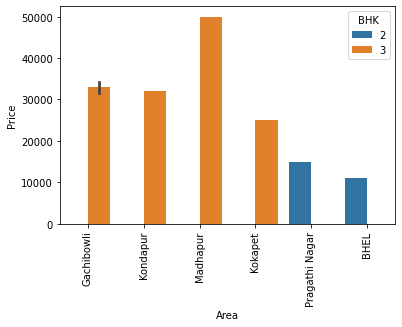

In [51]:
sns.barplot(x = Property_df5['Area'], y = Property_df5['Price'], hue = Property_df5['BHK'])
plt.xticks(rotation = 90)
plt.show()

If anyone don't want to pay any charges to agent/dealers or they want to directly rent house through Owner, he may get available in Gachibowli, Kondapur, Madhapur, Kokapet, Pragathi Nagar, BHEL in 2,3 BHK. Madhapur have higher 3BHK homes and BHEL have cheaper 2BHK homes

# No Deposit

In [16]:
Property_df6 = Property_df.loc[(Property_df['Deposit']=='')]

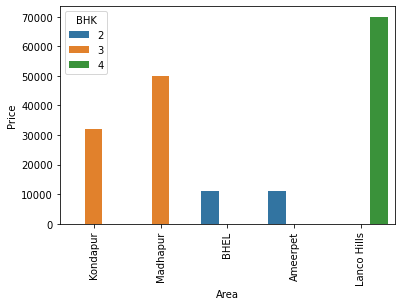

In [70]:
sns.barplot(x = Property_df6['Area'], y = Property_df6['Price'], hue = Property_df6['BHK'],ci = None)
plt.xticks(rotation = 90)
plt.show()

If anyone don't want to pay Deposit of homes, he/she may get home in 2,3,4 BHK in Kondapur, Madhapur, BHEL, Ammerpet, Lanco Hills


In [36]:
#Area & BHK Specific Data

Property_df7 = Property_df.loc[(Property_df['Area']=='Madhapur')&(Property_df['DealerType']=='Owner')]

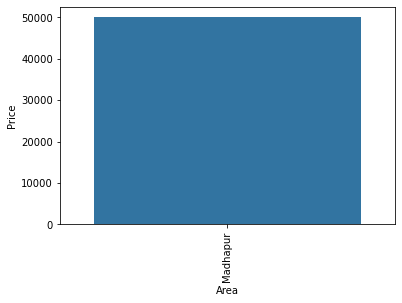

In [41]:
sns.barplot(x = Property_df7['Area'], y = Property_df7['Price'], data = Property_df7, )
plt.xticks(rotation = 90)
plt.show()

If someone wants home in Madhapur directly through owner, he/she will get around price for 50,000Rs.

In [30]:
#Area & BHK Specific Data
#For Women , Residential Apartment, Area : 'Gachibowli','Puppalaguda'

Property_df7 = Property_df.loc[(Property_df['Area'].isin(['Gachibowli','Puppalaguda']))&(Property_df['Type']=='Residential Apartment')& (Property_df['Tenants_Preffered']=='WOMEN')]

In [31]:
Property_df7.groupby(by='Area')['Price','BHK'].mean()

,Price,BHK
Area,,
Gachibowli,28000,3
Puppalaguda,42000,3


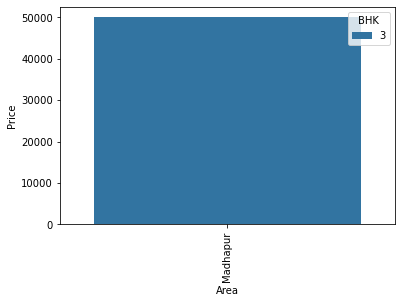

In [53]:
sns.barplot(x = Property_df7['Area'], y = Property_df7['Price'], hue = Property_df7['BHK'])
plt.xticks(rotation = 90)
plt.show()

If some Women wants  home in Residential Apartment, she will get in Gachbowli and Puppalaguda in 3BHK only. Pupalaguda prices are very higher as compared to Gachibowli

### Prices of 3 BHK Homes in Different Areas

In [55]:
Property_df8 = Property_df.loc[Property_df['BHK'] == 3]

In [27]:
Property_df8.groupby(by ='Area')['Price'].mean().sort_values(ascending = True)

Area
Pragathi Nagar    26000.000000
RTO Office        30000.000000
Kondapur          31500.000000
Appa Junction     32000.000000
Gachibowli        33000.000000
Kokapet           33333.333333
Gandipet          40000.000000
Puppalaguda       42000.000000
Madhapur          50000.000000
Hitech City       73500.000000
Name: Price, dtype: float64

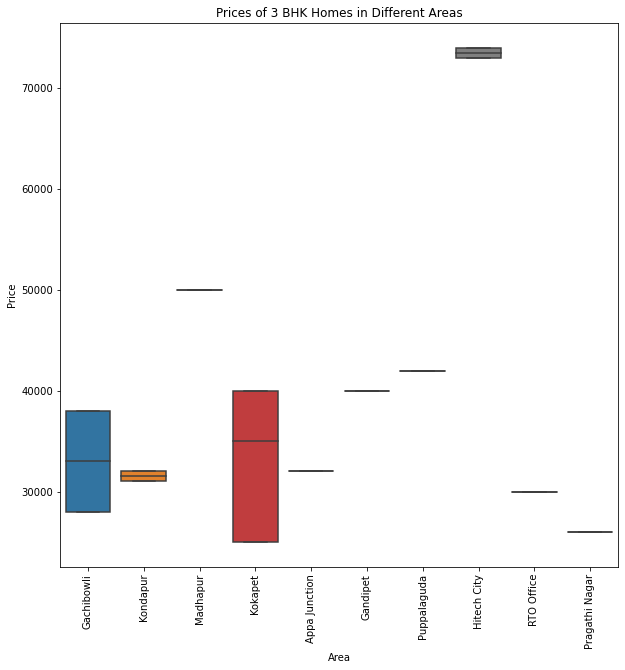

In [57]:
plt.figure(figsize = (10,10))
sns.boxplot(x = Property_df8['Area'], y = Property_df8['Price']).set_title('Prices of 3 BHK Homes in Different Areas')
plt.xticks(rotation = 90)
plt.show()

If someone want 3BHK houses in Hyderabad, he will get in Pragathi Nagar, RTO Office, Kondapur, Appa Junction, Gachibowli, Kokapet, Gandipet, Puppalaguda, Madhapur, Hitech City. Hitech City and Madhapur have very high Prices as compared to Others.

## Conclusion

* There is larger Availability of 2,3 and 4 BHK Homes as compared to 1 & 5 BHK which are Area Specific.

* Range of Available Prices of Homes is between 10K to 50K due to larger middle class customer

* There is Strong Corelation between Price and Area per sq.m. of Homes

* Prices of 2 BHK Homes are very higher in Gowlidoddy and Pragathi Nagar as compared to Ameerpet and BHEL

* Ratio of Price and Area per Sq.M.  is higher in Gowlidoddy and lower in BHEL and Ammerpet for 2 BHK

* Three types of Home available: Independent House, Independent Builder, Residential Apartment, in which Independent House are more expensive compared to others.

* There are only Two Areas where Women only Rent facility available: Gachibowli and Puppalaguda

* If any Customer have budget of 10,000 - 15,000, he gets home in only Ameerpet, BHEL, Kondapur & Pragathi Nagar in 1 & 2 BHK options. Pragathi Nagar has higher price compared to others.

* If any Customer have  budget greater than 40,000Rs, He will 3,4,5 BHK homes in Madhapur, Kokapet, Gandipet, Puppalaguda, Hitech City and Lanco Hills.Price of 3BHK homes are higher in Hitech City and 4BHK in Lanco Hills. While Kokapet and Gandipet have cheapest 3BHK homes among them. 5BHK homes are available only in Madhapur 

* If anyone want directly rent house through Owner, he may get available in Gachibowli, Kondapur, Madhapur, Kokapet, Pragathi Nagar, BHEL in 2,3 BHK. Madhapur have higher 3BHK homes and BHEL have cheaper 2BHK homes

* If anyone don't want to pay Deposit of homes, he/she may get home in 2,3,4 BHK in Kondapur, Madhapur, BHEL, Ammerpet, Lanco Hills


* 3BHK houses in Hyderabad are available in Pragathi Nagar, RTO Office, Kondapur, Appa Junction, Gachibowli, Kokapet, Gandipet, Puppalaguda, Madhapur, Hitech City Area.  
Price range varies from 25k to 85k.   
Hitech City and Madhapur have very high Prices as compared to Others.